In [23]:
"""
* Exercise 2.5, Sutton.
* Generalized Bandit Prolem - For values specified in the exercise, use - 
* k = 10, alpha = 0.1, epsilon = 0.1, and time_steps = 10000
"""

import numpy as np
from random import random as rand, randint as randrange
import argparse
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
num_simulations = 1000 # Total number of simulations to run
time_steps = 10000 # Number of steps in each simulation
num_arms = 10 # Number of arms the bandit should have
num_tests = 1 # Should be equal to the number of epsilon values provided
epsilon = [0.1] # Takes values between 0 and 1
alpha_val = 0.1 # can take any positive value

In [25]:
class KArmTestBed:
    def __init__(self, num_simulations, time_steps, k):
        self.num_simulations = num_simulations
        self.time_steps = time_steps
        self.k = k
        self.results = {}

    """
    * Add a test with a particular epsilon. Each test case is associated with one epsilon
    * value.
    """
    def add_test(self, epsilon):
        self.epsilon = epsilon
        self.results[self.epsilon] = 0


    """
    * Run a test with a particular epsilon
    * Stores average reward and average cumulative reward at time t for the test
    * qa starts off with equal values, and take random walks
    """
    def run_test(self):
        total_reward_at_time_t = [0] * self.time_steps
        total_cumulative_reward_at_time_t = [0] * self.time_steps
        total_optimal_actions_at_time_t = [0] * self.time_steps
        for sim in range(self.num_simulations):
            # Initialize all qa to be equal
            qa = [0] * self.k 
            action_reward_estimate = [0] * self.k
            num_pulls = [0] * self.k
            cumulative_reward = 0
            for time in range(self.time_steps):

                # Random Walk at each time step
                qa = list(map(lambda x: x + np.random.normal(0, 0.01), qa))
                optimal_action_arm = qa.index(max(qa))
                
                if rand() > self.epsilon:
                    arm = action_reward_estimate.index(max(action_reward_estimate))
                else:
                    arm = randrange(0, self.k-1)
                
                if arm == optimal_action_arm:
                    total_optimal_actions_at_time_t[time] += 1
                
                # Calculate Reward
                reward = np.random.normal(qa[arm], 1)
                total_reward_at_time_t[time] += reward

                cumulative_reward += reward
                total_cumulative_reward_at_time_t[time] += cumulative_reward
                
                # Calculate Alpha
                num_pulls[arm] += 1
                if step == "SampleMean":
                    alpha = (1/(num_pulls[arm]))
                elif step == "Constant":
                    alpha = alpha_val
                    
                # Update Reward estimates
                action_reward_estimate[arm] = action_reward_estimate[arm] + \
                    alpha * (reward - action_reward_estimate[arm])

        self.results[self.epsilon] = {
            "Average Cumulative Reward at time t": list(map(lambda x: x / self.num_simulations, total_cumulative_reward_at_time_t)),
            "Average Reward at time t": list(map(lambda x: x / self.num_simulations, total_reward_at_time_t)),
            "Percentage Optimal Action at time t": list(map(lambda x: (x / self.num_simulations) * 100, total_optimal_actions_at_time_t))
        }


    """
    * Plot the average reward at each time step.
    * Plot the percentage of optimal action at each time step
    """
    def plot_results(self):
        legend = []
        plt.figure(1)
        for epsilon in self.results:
            plt.plot(np.arange(self.time_steps),
                     self.results[epsilon]["Average Reward at time t"])
            legend.append("Epsilon = " + str(epsilon))
        plt.legend(legend, loc='lower right')
        plt.xlabel("Time Steps")
        plt.ylabel("Average Reward")
        
        plt.figure(2)
        for epsilon in self.results:
            plt.plot(np.arange(self.time_steps), self.results[epsilon]["Percentage Optimal Action at time t"])
            legend.append("Epsilon = " + str(epsilon))
        plt.legend(legend, loc='lower right')
        plt.xlabel("Time Steps")
        plt.ylabel("% Optimal Action")
        plt.show()


In [26]:
# alpha = sample mean

step = "SampleMean"  # Can Also take value 'Constant'

bandit = KArmTestBed(num_simulations, time_steps, num_arms)
print("Test Conditions:\nNumber of Simulations per Test: {}\nNumber of Time Steps per Simulation: {}\nNumber of Arms: {}\n"
      .format(num_simulations, time_steps, num_arms))
if num_tests != len(epsilon):
    raise argparse.ArgumentTypeError(
        "Number of tests should be equal to number of epsilons")
for test in range(num_tests):
    print("Running test {} with epsilon {}".format(
        test+1, epsilon[test]))
    bandit.add_test(epsilon[test])
    bandit.run_test()

Test Conditions:
Number of Simulations per Test: 1000
Number of Time Steps per Simulation: 10000
Number of Arms: 10

Running test 1 with epsilon 0.1


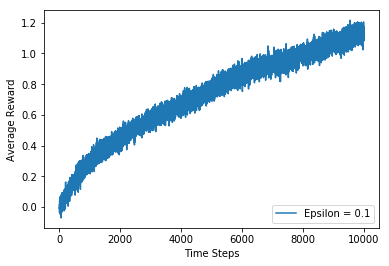

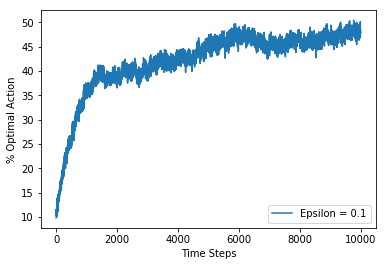

In [27]:
# alpha = sample mean
bandit.plot_results()

In [28]:
# Alpha = Constant

step = "Constant"  # Can Also take value 'SampleMean'

bandit = KArmTestBed(num_simulations, time_steps, num_arms)
print("Test Conditions:\nNumber of Simulations per Test: {}\nNumber of Time Steps per Simulation: {}\nNumber of Arms: {}\n"
      .format(num_simulations, time_steps, num_arms))
if num_tests != len(epsilon):
    raise argparse.ArgumentTypeError(
        "Number of tests should be equal to number of epsilons")
for test in range(num_tests):
    print("Running test {} with epsilon {}".format(
        test+1, epsilon[test]))
    bandit.add_test(epsilon[test])
    bandit.run_test()

Test Conditions:
Number of Simulations per Test: 1000
Number of Time Steps per Simulation: 10000
Number of Arms: 10

Running test 1 with epsilon 0.1


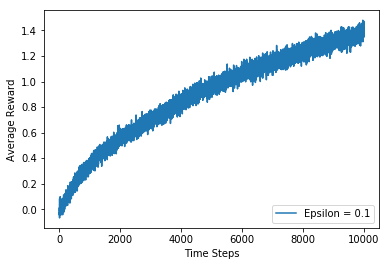

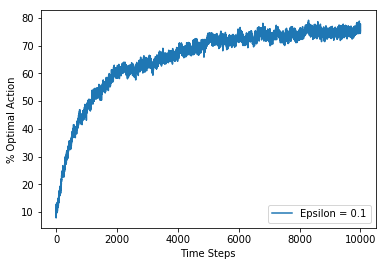

In [29]:
# Alpha = Constant
bandit.plot_results()